In [1]:
import pandas as pd
df = pd.read_csv('data/Data_Scientist_case_study_Inspections.csv')
df_auctions = pd.read_csv('data/Data_Scientist_case_study_Auctions.csv')

In [3]:
import json
import numpy as np
from datetime import datetime

In [4]:
df.head()

,inspection_id,car_id,inspection_date,inspection_leadsource,deleted_at,inspection_number_of_damages,category_scores,start_time,end_time,inspection_report
0,c8ccfbc9-b8d8-4103-a00a-6b54c2318567,9fe0a125-38cb-4ce1-bafd-befe94613435,2019-02-20 17:14:19,privateSeller,NaN,12,"[{""id"": ""documentsCheck"", ""score"": 0.75, ""titl...",2019-02-20 16:25:12,NaN,"{""NIK"": true, ""tax"": ""08/2019"", ""bpkb"": ""onHan..."
1,b75c60df-054f-477e-93fd-058f5c5f5229,feea7e48-423c-449c-b965-e08e7289909d,2019-02-11 12:08:38,privateSeller,NaN,4,"[{""id"": ""documentsCheck"", ""score"": 0.25, ""titl...",2019-02-11 11:42:15,NaN,"{""NIK"": false, ""tax"": ""03/2015"", ""bpkb"": ""onHa..."
2,e97f22a8-5922-42e8-ab07-8c26e089df8f,d7c01e9f-3fa5-41a7-bdd6-840e8989d4e2,2019-06-22 14:13:41,privateSeller,NaN,77,"[{""id"": ""documentsCheck"", ""score"": 0.5, ""title...",2019-06-22 13:25:50,NaN,"{""NIK"": false, ""tax"": ""03/2019"", ""bpkb"": ""onHa..."
3,69c6e541-2e6e-4a9e-825f-a573d273f9a6,7f9e3bc3-c653-436b-9263-e16853638c50,2019-06-15 14:58:58,privateSeller,NaN,16,"[{""id"": ""documentsCheck"", ""score"": 0.5, ""title...",2019-06-15 14:19:15,NaN,"{""NIK"": true, ""tax"": ""05/2020"", ""bpkb"": ""onHan..."
4,6bbf86e8-7865-4ebd-a8a0-59c34dfce6a3,2eb5819e-fd80-44c2-a9de-a72d10c2a7c5,2019-05-05 10:14:15,privateSeller,NaN,69,"[{""id"": ""documentsCheck"", ""score"": 0.5, ""title...",2019-05-05 09:35:19,NaN,"{""NIK"": false, ""tax"": ""05/2017"", ""bpkb"": ""onHa..."


- add features about inspection_report

In [5]:
json.loads(df.iloc[0].inspection_report)

{'NIK': True,
 'tax': '08/2019',
 'bpkb': 'onHand',
 'fuel': 'inspection.field.fuelType.petrol',
 'horn': True,
 'jack': True,
 'keur': False,
 'make': 'Honda',
 'stnk': True,
 'trim': '1.5 RS Bensin',
 'year': 2017,
 'acGas': True,
 'belts': True,
 'hoses': True,
 'model': 'Mobilio',
 'price': 0,
 'tools': True,
 'wires': True,
 'blower': 'on',
 'clutch': True,
 'copyId': True,
 'tieRod': True,
 'zLinks': True,
 'armRest': 'on',
 'cooling': True,
 'fuelCap': True,
 'heating': 'n/a',
 'invoice': True,
 'keySets': '2',
 'mileage': 10878,
 'pulleys': True,
 'rackEnd': True,
 'gloveBox': True,
 'headRest': 'on',
 'radiator': True,
 'bootBoard': True,
 'bootFloor': True,
 'brakePads': True,
 'condensor': True,
 'cowlPanel': True,
 'engineOil': True,
 'ownership': 'individual',
 'sunshades': True,
 'trunkLock': True,
 'audioVideo': True,
 'ballJoints': True,
 'bootCarpet': True,
 'compressor': True,
 'driverSeat': True,
 'gearMounts': True,
 'headGasket': True,
 'leadsource': 'inspection.fi

In [6]:
def generrate_inspection(row, the_key):
    json_data = row['inspection_report']
    try:
        python_obj = json.loads(json_data)
        if the_key in python_obj.keys():
            return python_obj[the_key]
        else:
            return float("nan")
    except:
        return float("nan")

#gerate_inspection(df.iloc[0],  list(json.loads(json_data).keys())[0])

In [7]:
## This take long to run:
## Run to add features about inspection_report
df_extend = df.copy()
insp_json_data = df.iloc[0].inspection_report
for thekey in list(json.loads(insp_json_data).keys()):
    col_name = 'insp_rep_' + thekey
    df_extend[col_name] = df_extend.apply( generrate_inspection, args=[thekey], axis = 1) 
    
#df_extend['newcol'] = df_extend['oldcol'].apply(lambda x: x*2)

In [8]:
print (df_extend.shape)
df_extend.columns

(21160, 200)


Index(['inspection_id', 'car_id', 'inspection_date', 'inspection_leadsource',
       'deleted_at', 'inspection_number_of_damages', 'category_scores',
       'start_time', 'end_time', 'inspection_report',
       ...
       'insp_rep_paintscannerFrontBumper', 'insp_rep_powerSteeringOilLeakage',
       'insp_rep_dashControlParkingButton',
       'insp_rep_seatAdjusterReclinerLeft',
       'insp_rep_priceInspectorExpectation',
       'insp_rep_seatAdjusterLearTrackLeft',
       'insp_rep_seatAdjusterReclinerRight',
       'insp_rep_seatAdjusterLearTrackRight',
       'insp_rep_sideMirrorLeftAutoRetracts',
       'insp_rep_sideMirrorRightAutoRetracts'],
      dtype='object', length=200)

- add features about category_scores

In [9]:
df_extend.head()

,inspection_id,car_id,inspection_date,inspection_leadsource,deleted_at,inspection_number_of_damages,category_scores,start_time,end_time,inspection_report,...,insp_rep_paintscannerFrontBumper,insp_rep_powerSteeringOilLeakage,insp_rep_dashControlParkingButton,insp_rep_seatAdjusterReclinerLeft,insp_rep_priceInspectorExpectation,insp_rep_seatAdjusterLearTrackLeft,insp_rep_seatAdjusterReclinerRight,insp_rep_seatAdjusterLearTrackRight,insp_rep_sideMirrorLeftAutoRetracts,insp_rep_sideMirrorRightAutoRetracts
0,c8ccfbc9-b8d8-4103-a00a-6b54c2318567,9fe0a125-38cb-4ce1-bafd-befe94613435,2019-02-20 17:14:19,privateSeller,NaN,12,"[{""id"": ""documentsCheck"", ""score"": 0.75, ""titl...",2019-02-20 16:25:12,NaN,"{""NIK"": true, ""tax"": ""08/2019"", ""bpkb"": ""onHan...",...,021,True,True,True,160000000,True,True,True,on,on
1,b75c60df-054f-477e-93fd-058f5c5f5229,feea7e48-423c-449c-b965-e08e7289909d,2019-02-11 12:08:38,privateSeller,NaN,4,"[{""id"": ""documentsCheck"", ""score"": 0.25, ""titl...",2019-02-11 11:42:15,NaN,"{""NIK"": false, ""tax"": ""03/2015"", ""bpkb"": ""onHa...",...,0000,False,True,True,5000000,True,True,True,n/a,n/a
2,e97f22a8-5922-42e8-ab07-8c26e089df8f,d7c01e9f-3fa5-41a7-bdd6-840e8989d4e2,2019-06-22 14:13:41,privateSeller,NaN,77,"[{""id"": ""documentsCheck"", ""score"": 0.5, ""title...",2019-06-22 13:25:50,NaN,"{""NIK"": false, ""tax"": ""03/2019"", ""bpkb"": ""onHa...",...,0000,False,True,True,110000000,True,True,True,n/a,n/a
3,69c6e541-2e6e-4a9e-825f-a573d273f9a6,7f9e3bc3-c653-436b-9263-e16853638c50,2019-06-15 14:58:58,privateSeller,NaN,16,"[{""id"": ""documentsCheck"", ""score"": 0.5, ""title...",2019-06-15 14:19:15,NaN,"{""NIK"": true, ""tax"": ""05/2020"", ""bpkb"": ""onHan...",...,0000,True,True,True,250000000,True,True,True,on,on
4,6bbf86e8-7865-4ebd-a8a0-59c34dfce6a3,2eb5819e-fd80-44c2-a9de-a72d10c2a7c5,2019-05-05 10:14:15,privateSeller,NaN,69,"[{""id"": ""documentsCheck"", ""score"": 0.5, ""title...",2019-05-05 09:35:19,NaN,"{""NIK"": false, ""tax"": ""05/2017"", ""bpkb"": ""onHa...",...,0000,False,True,True,400000000,True,True,True,on,on


In [10]:
df_extend.iloc[:,50:100].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21160 entries, 0 to 21159
Data columns (total 50 columns):
insp_rep_engineOil       21160 non-null bool
insp_rep_ownership       21160 non-null object
insp_rep_sunshades       21160 non-null bool
insp_rep_trunkLock       21160 non-null bool
insp_rep_audioVideo      21160 non-null bool
insp_rep_ballJoints      21160 non-null bool
insp_rep_bootCarpet      21160 non-null bool
insp_rep_compressor      21160 non-null bool
insp_rep_driverSeat      21160 non-null bool
insp_rep_gearMounts      21160 non-null bool
insp_rep_headGasket      21160 non-null bool
insp_rep_leadsource      21160 non-null object
insp_rep_manualBook      21160 non-null bool
insp_rep_puntureKit      21160 non-null bool
insp_rep_rearBushes      21160 non-null bool
insp_rep_rearShocks      21160 non-null bool
insp_rep_spareWheel      21160 non-null bool
insp_rep_suctionFan      21160 non-null bool
insp_rep_backSealant     21160 non-null bool
insp_rep_emptyBlanko     21160 n

In [11]:
#pd.DataFrame(json.loads(df.iloc[1].category_scores)).set_index('id')

In [12]:
def generrate_cat_data(row, the_key):
    json_data = row['category_scores']
    try:
        tmp_df = pd.DataFrame(json.loads(json_data)).set_index('id')
        if the_key in list(tmp_df.index):
            return tmp_df.loc[the_key]['score']
        else:
            return float("nan")
    except:
        return float("nan")

In [13]:
## This take long to run:
## Run to add features about category_scores
df_extend_test = df_extend.copy()
cate_json_data = df.iloc[0].category_scores
for obj in list(json.loads(cate_json_data)) :
    col_name = 'cat_score_' + obj['id']
    df_extend_test[col_name] = df_extend_test.apply( generrate_cat_data, args=[obj['id']], axis = 1)

In [14]:
print (df_extend_test.shape)
df_extend_test.columns

(21160, 219)


Index(['inspection_id', 'car_id', 'inspection_date', 'inspection_leadsource',
       'deleted_at', 'inspection_number_of_damages', 'category_scores',
       'start_time', 'end_time', 'inspection_report',
       ...
       'cat_score_mirrors', 'cat_score_seats', 'cat_score_power',
       'cat_score_dashboardRoof', 'cat_score_poshish', 'cat_score_equipment',
       'cat_score_acHeater', 'cat_score_electrical', 'cat_score_carFrame',
       'cat_score_exteriorLights'],
      dtype='object', length=219)

In [15]:
df_extend_test.head()

,inspection_id,car_id,inspection_date,inspection_leadsource,deleted_at,inspection_number_of_damages,category_scores,start_time,end_time,inspection_report,...,cat_score_mirrors,cat_score_seats,cat_score_power,cat_score_dashboardRoof,cat_score_poshish,cat_score_equipment,cat_score_acHeater,cat_score_electrical,cat_score_carFrame,cat_score_exteriorLights
0,c8ccfbc9-b8d8-4103-a00a-6b54c2318567,9fe0a125-38cb-4ce1-bafd-befe94613435,2019-02-20 17:14:19,privateSeller,NaN,12,"[{""id"": ""documentsCheck"", ""score"": 0.75, ""titl...",2019-02-20 16:25:12,NaN,"{""NIK"": true, ""tax"": ""08/2019"", ""bpkb"": ""onHan...",...,1.0,1.0,1.00,1.00,1.00,0.83,1.00,1.0,1.00,1.00
1,b75c60df-054f-477e-93fd-058f5c5f5229,feea7e48-423c-449c-b965-e08e7289909d,2019-02-11 12:08:38,privateSeller,NaN,4,"[{""id"": ""documentsCheck"", ""score"": 0.25, ""titl...",2019-02-11 11:42:15,NaN,"{""NIK"": false, ""tax"": ""03/2015"", ""bpkb"": ""onHa...",...,0.0,1.0,0.33,0.63,0.00,0.17,0.00,0.4,0.61,0.40
2,e97f22a8-5922-42e8-ab07-8c26e089df8f,d7c01e9f-3fa5-41a7-bdd6-840e8989d4e2,2019-06-22 14:13:41,privateSeller,NaN,77,"[{""id"": ""documentsCheck"", ""score"": 0.5, ""title...",2019-06-22 13:25:50,NaN,"{""NIK"": false, ""tax"": ""03/2019"", ""bpkb"": ""onHa...",...,1.0,1.0,0.67,0.78,0.63,0.50,0.25,0.8,0.81,0.33
3,69c6e541-2e6e-4a9e-825f-a573d273f9a6,7f9e3bc3-c653-436b-9263-e16853638c50,2019-06-15 14:58:58,privateSeller,NaN,16,"[{""id"": ""documentsCheck"", ""score"": 0.5, ""title...",2019-06-15 14:19:15,NaN,"{""NIK"": true, ""tax"": ""05/2020"", ""bpkb"": ""onHan...",...,1.0,1.0,1.00,0.88,0.75,1.00,1.00,1.0,0.94,1.00
4,6bbf86e8-7865-4ebd-a8a0-59c34dfce6a3,2eb5819e-fd80-44c2-a9de-a72d10c2a7c5,2019-05-05 10:14:15,privateSeller,NaN,69,"[{""id"": ""documentsCheck"", ""score"": 0.5, ""title...",2019-05-05 09:35:19,NaN,"{""NIK"": false, ""tax"": ""05/2017"", ""bpkb"": ""onHa...",...,1.0,1.0,1.00,0.70,0.88,0.33,1.00,1.0,0.87,1.00


In [16]:
df_extend_test.iloc[:,0:50].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21160 entries, 0 to 21159
Data columns (total 50 columns):
inspection_id                   21160 non-null object
car_id                          21045 non-null object
inspection_date                 21160 non-null object
inspection_leadsource           21160 non-null object
deleted_at                      11 non-null object
inspection_number_of_damages    21160 non-null int64
category_scores                 21160 non-null object
start_time                      21160 non-null object
end_time                        993 non-null object
inspection_report               21160 non-null object
insp_rep_NIK                    20125 non-null object
insp_rep_tax                    21160 non-null object
insp_rep_bpkb                   21160 non-null object
insp_rep_fuel                   21160 non-null object
insp_rep_horn                   21160 non-null bool
insp_rep_jack                   21160 non-null bool
insp_rep_keur                   21160

## Save DataFrame

In [17]:
#df_extend_test.to_csv('used_car_extend_clean.csv',index=False)

## Load from Save
- see problem null entries increase randomly

In [152]:
df_extend_load = pd.read_csv('used_car_extend_clean.csv') #

In [153]:
df_extend_load.iloc[:,0:50].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21159 entries, 0 to 21158
Data columns (total 50 columns):
inspection_id                   21159 non-null object
car_id                          21159 non-null object
inspection_date                 21159 non-null object
inspection_leadsource           21159 non-null object
inspection_number_of_damages    21159 non-null int64
category_scores                 21159 non-null object
start_time                      21159 non-null object
inspection_report               21159 non-null object
insp_rep_tax                    21159 non-null object
insp_rep_bpkb                   21159 non-null object
insp_rep_fuel                   21159 non-null object
insp_rep_horn                   21159 non-null int64
insp_rep_jack                   21159 non-null int64
insp_rep_keur                   21159 non-null int64
insp_rep_make                   21159 non-null object
insp_rep_stnk                   21159 non-null int64
insp_rep_trim                   

In [96]:
## variables that have save/load problem
## before save nonull but after reload there are null values
# 'insp_rep_blower', 'insp_rep_armRest', 'insp_rep_heating', 'insp_rep_headRest', 'insp_rep_ownership'
# insp_rep_fogLightLeft, insp_rep_discBreakLeft, 
# insp_rep_dashControlDeFog, insp_rep_matchingVinNumber, insp_rep_trunkDoorFunction, 
# insp_rep_extraMonitorFunction, insp_rep_matchingEngineNumber, 
# insp_rep_sideMirrorLeftAutoRetracts, insp_rep_sideMirrorRightAutoRetracts

# THIS IS because when saving the value 'n/a' was save as null

## Back to df_extend_test

In [18]:
df_extend_test.shape

(21160, 219)

In [19]:
# columns with a lot null values, consider drop these column
col_alot_null = ['deleted_at', 'end_time', 'insp_rep_NIK', 'insp_rep_paintscannerFrontBumper']
df_extend_test = df_extend_test.drop(col_alot_null, axis=1)

In [20]:
df_extend_test.shape

(21160, 215)

In [21]:
# car_id - fillna with -1
# insp_rep_priceInspectorExpectation fillna with -1

df_extend_test['car_id'] = df_extend_test['car_id'].fillna(-1)
#df_extend_test.loc[:,'car_id':'car_id'].info()
df_extend_test['insp_rep_priceInspectorExpectation'] = df_extend_test['insp_rep_priceInspectorExpectation'].fillna(-1)
#df_extend_test.loc[:,'insp_rep_priceInspectorExpectation':'insp_rep_priceInspectorExpectation'].info()

In [22]:
df_extend_test.shape

(21160, 215)

In [23]:
# then drop na
df_extend_test = df_extend_test.dropna().reset_index(drop=True)

In [24]:
df_extend_test.shape

(21159, 215)

In [25]:
# Now, there should not be null 
df_extend_test.iloc[:,200:].isnull().sum()

cat_score_exhaust             0
cat_score_engine              0
cat_score_brakes              0
cat_score_suspension          0
cat_score_steeringControls    0
cat_score_mirrors             0
cat_score_seats               0
cat_score_power               0
cat_score_dashboardRoof       0
cat_score_poshish             0
cat_score_equipment           0
cat_score_acHeater            0
cat_score_electrical          0
cat_score_carFrame            0
cat_score_exteriorLights      0
dtype: int64

In [26]:
df_extend_test.shape

(21159, 215)

- Convert True False to 1 0
    - how to deal with NAN ?

In [27]:
list_bool_keys = []
for key, val in json.loads(df.iloc[0].inspection_report).items():
    if type(val) == type(True):
        #print (key, val, type(val))
        list_bool_keys += ['insp_rep_'+key]

In [28]:
len(list_bool_keys)
for iname in df_extend_test.columns:
    if iname in list_bool_keys: 
        df_extend_test[iname] = df_extend_test[iname].astype(int)

- Convert datetime object

In [29]:
#Datetime
# inspection_date, insp_rep_tax
df_extend_test['inspection_date']= pd.to_datetime(df_extend_test['inspection_date']) 

In [30]:
def str_my_to_datetime(row):
    try:
        out = datetime.strptime(row['insp_rep_tax'], '%m/%Y')
        return out
    except: 
        return datetime(5000,12,31)

In [31]:
df_extend_test['insp_rep_tax'] = df_extend_test.apply( str_my_to_datetime , axis = 1)

- Further checking object type

In [32]:
# at this point, many columns are still object

In [33]:
df_extend_test.iloc[:,0:50].info()
#df_extend_test.iloc[0,150:200]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21159 entries, 0 to 21158
Data columns (total 50 columns):
inspection_id                   21159 non-null object
car_id                          21159 non-null object
inspection_date                 21159 non-null datetime64[ns]
inspection_leadsource           21159 non-null object
inspection_number_of_damages    21159 non-null int64
category_scores                 21159 non-null object
start_time                      21159 non-null object
inspection_report               21159 non-null object
insp_rep_tax                    21159 non-null object
insp_rep_bpkb                   21159 non-null object
insp_rep_fuel                   21159 non-null object
insp_rep_horn                   21159 non-null int64
insp_rep_jack                   21159 non-null int64
insp_rep_keur                   21159 non-null int64
insp_rep_make                   21159 non-null object
insp_rep_stnk                   21159 non-null int64
insp_rep_trim           

In [34]:
# on, off, n/a
list_dummie_onoffna = [
    'insp_rep_blower',
    'insp_rep_armRest',
    'insp_rep_heating',
    'insp_rep_headRest',
    'insp_rep_fogLightLeft',
    'insp_rep_discBreakLeft',
    'insp_rep_fogLightRight',
    'insp_rep_discBreakRight',
    'insp_rep_dashControlDeFog',
    'insp_rep_matchingVinNumber',
    'insp_rep_trunkDoorFunction',
    'insp_rep_extraMonitorFunction',
    'insp_rep_matchingEngineNumber',
    'insp_rep_sideMirrorLeftAutoRetracts',
    'insp_rep_sideMirrorRightAutoRetracts'
]

In [35]:
def replace_na_with_notavail(row, col_name):
    try:
        if row[col_name] == 'n/a':
            return 'notavail'
        else:
            return row[col_name]
    except: 
        return 'notavail'

# :testing
# df_mytest = df_extend_test.copy()
# df_mytest.iloc[1]['insp_rep_armRest']
# replace_na_with_notavail(df_mytest.iloc[1], 'insp_rep_armRest')
# df_mytest['insp_rep_armRest'] = df_mytest.apply( replace_na_with_notavail , args = ['insp_rep_armRest'], axis = 1)
# df_mytest['insp_rep_armRest'].value_counts()

In [36]:
for onoffvar in list_dummie_onoffna:
    df_extend_test[onoffvar] = df_extend_test.apply( replace_na_with_notavail , args = [onoffvar], axis = 1)

- check the result of function replace_na_with_notavail()

In [37]:
#df_extend_test['insp_rep_fuel'].isnull().sum()
df_extend_test['insp_rep_sideMirrorRightAutoRetracts'].value_counts()

notavail    13030
on           7450
off           679
Name: insp_rep_sideMirrorRightAutoRetracts, dtype: int64

In [38]:
#df_extend_load['insp_rep_fogLightRight'].isnull().sum()
#df_extend_load['insp_rep_sideMirrorRightAutoRetracts'].value_counts()

## Categorical Vars

In [39]:
list_dummie = []

# categorical
list_dummie += [
    'inspection_leadsource',
    'insp_rep_bpkb',
    'insp_rep_make',
    'insp_rep_model',
    'insp_rep_ownership'
]

# on, off, n/a
list_dummie += list_dummie_onoffna

# other categorical
list_dummie += [
    'insp_rep_fuel',
    'insp_rep_leadsource',
    'insp_rep_formAOption',
    'insp_rep_chassisColor',
    'insp_rep_transmission',
    'insp_rep_frontAirbagOption',
    'insp_rep_1stOwnershipOption'
]

In [40]:
list_dummie

['inspection_leadsource',
 'insp_rep_bpkb',
 'insp_rep_make',
 'insp_rep_model',
 'insp_rep_ownership',
 'insp_rep_blower',
 'insp_rep_armRest',
 'insp_rep_heating',
 'insp_rep_headRest',
 'insp_rep_fogLightLeft',
 'insp_rep_discBreakLeft',
 'insp_rep_fogLightRight',
 'insp_rep_discBreakRight',
 'insp_rep_dashControlDeFog',
 'insp_rep_matchingVinNumber',
 'insp_rep_trunkDoorFunction',
 'insp_rep_extraMonitorFunction',
 'insp_rep_matchingEngineNumber',
 'insp_rep_sideMirrorLeftAutoRetracts',
 'insp_rep_sideMirrorRightAutoRetracts',
 'insp_rep_fuel',
 'insp_rep_leadsource',
 'insp_rep_formAOption',
 'insp_rep_chassisColor',
 'insp_rep_transmission',
 'insp_rep_frontAirbagOption',
 'insp_rep_1stOwnershipOption']

- drop unuseful variable
- one hot coding

In [41]:
# will drop : insp_rep_trim : e.g. '1.5 RS Bensin' >> seems not useful
df_extend_test = df_extend_test.drop('insp_rep_trim', axis=1)

In [42]:
# one hot coding the other categorical vars
dfDummies = pd.get_dummies(df_extend_test[list_dummie])
df_extend_test = pd.concat([df_extend_test, dfDummies], axis=1)

- checking 

In [43]:
print (sum(list(df_extend_test.isnull().sum())))
print (df_extend_test.shape)
list(df_extend_test.columns)

0
(21159, 807)


['inspection_id',
 'car_id',
 'inspection_date',
 'inspection_leadsource',
 'inspection_number_of_damages',
 'category_scores',
 'start_time',
 'inspection_report',
 'insp_rep_tax',
 'insp_rep_bpkb',
 'insp_rep_fuel',
 'insp_rep_horn',
 'insp_rep_jack',
 'insp_rep_keur',
 'insp_rep_make',
 'insp_rep_stnk',
 'insp_rep_year',
 'insp_rep_acGas',
 'insp_rep_belts',
 'insp_rep_hoses',
 'insp_rep_model',
 'insp_rep_price',
 'insp_rep_tools',
 'insp_rep_wires',
 'insp_rep_blower',
 'insp_rep_clutch',
 'insp_rep_copyId',
 'insp_rep_tieRod',
 'insp_rep_zLinks',
 'insp_rep_armRest',
 'insp_rep_cooling',
 'insp_rep_fuelCap',
 'insp_rep_heating',
 'insp_rep_invoice',
 'insp_rep_keySets',
 'insp_rep_mileage',
 'insp_rep_pulleys',
 'insp_rep_rackEnd',
 'insp_rep_gloveBox',
 'insp_rep_headRest',
 'insp_rep_radiator',
 'insp_rep_bootBoard',
 'insp_rep_bootFloor',
 'insp_rep_brakePads',
 'insp_rep_condensor',
 'insp_rep_cowlPanel',
 'insp_rep_engineOil',
 'insp_rep_ownership',
 'insp_rep_sunshades',
 '

In [44]:
#df_extend_test.to_csv('used_car_extend__model_clean.csv',index=False)

## Now prepare the df for modeling

In [45]:
df_model = df_extend_test.copy()
df_model.shape

(21159, 807)

In [46]:
df_model.iloc[0,200:250]

cat_score_engine                          1
cat_score_brakes                          1
cat_score_suspension                      1
cat_score_steeringControls                1
cat_score_mirrors                         1
cat_score_seats                           1
cat_score_power                           1
cat_score_dashboardRoof                   1
cat_score_poshish                         1
cat_score_equipment                    0.83
cat_score_acHeater                        1
cat_score_electrical                      1
cat_score_carFrame                        1
cat_score_exteriorLights                  1
inspection_leadsource_hotLeads            0
inspection_leadsource_other               0
inspection_leadsource_privateSeller       1
inspection_leadsource_youtube             0
insp_rep_bpkb_notAvailable                0
insp_rep_bpkb_onHand                      1
insp_rep_bpkb_onLease                     0
insp_rep_make_Audi                        0
insp_rep_make_BMW               

## join table with price

In [47]:
df_auctions.shape

(24053, 17)

In [48]:
df_model.shape

(21159, 807)

In [49]:
df_model_auctions = pd.merge(df_auctions, df_model, on='car_id', how='inner')

In [50]:
df_model_auctions.shape

(24042, 823)

In [51]:
df_model_auctions.iloc[:5,:20]

,auction_id,car_id,auction_created_date,auction_start_date,auction_original_end_date,auction_end_date,buy_now_enabled,auction_start_price,winning_bid_price,auction_buy_now_price,won_with_buy_now,winner_dealer_id,number_of_extensions,has_winner,number_of_bids,number_of_bidders,returned,inspection_id,inspection_date,inspection_leadsource
0,970071d7-73cd-4d7f-ba9f-d2e777fd39f9,5242c91e-74c1-410b-bef6-76747628bd58,2019-08-03 12:19:33.000,2019-08-03 12:20:00.000,2019-08-03 12:35:00.000,2019-08-03 12:36:31.474,False,102000000.0,117000000.0,117000000.0,True,9a7545da-bc15-4ecb-a2dd-59bde36fe175,10,True,24.0,8.0,False,78642603-ec3e-4dd5-8297-a9686c9733ac,2019-08-03 12:11:53,privateSeller
1,c830bbc1-cc6c-479f-a294-e46cad6456d5,6854220b-490d-40d7-8970-1203a88835b3,2019-07-13 12:46:25.000,2019-07-13 12:50:00.000,2019-07-13 13:05:00.000,2019-07-13 13:10:30.000,True,135000000.0,146000000.0,150000000.0,False,9ff185e1-9b94-46d8-93ba-ca49d728da84,22,True,22.0,4.0,False,156b34ab-b81f-49eb-8251-9f79e724aa48,2019-07-13 11:40:30,privateSeller
2,c196046d-ee5f-4635-98f4-612aa1428652,6854220b-490d-40d7-8970-1203a88835b3,2019-07-13 11:54:39.000,2019-07-13 11:55:00.000,2019-07-13 12:10:00.000,2019-07-13 12:10:15.000,True,135000000.0,135500000.0,150000000.0,False,NaN,1,False,1.0,1.0,False,156b34ab-b81f-49eb-8251-9f79e724aa48,2019-07-13 11:40:30,privateSeller
3,0ba4e850-e144-46e5-8562-b6eb2d0ce56c,56f87971-d620-4dbf-b5e1-1a008141bab1,2019-05-03 18:12:09.000,2019-05-03 18:15:00.000,2019-05-03 18:30:00.000,2019-05-03 18:36:30.000,True,320000000.0,334000000.0,350000000.0,False,NaN,26,False,29.0,3.0,False,52ddd490-e28c-4a4a-b7de-7e6a9e7174b9,2019-05-03 17:32:51,privateSeller
4,0d2bb5c6-8798-4877-a8c6-63caa138bed5,0b18f5e7-0b0e-44f3-af48-4d73d44586e7,2019-06-16 17:48:42.000,2019-06-16 17:50:00.000,2019-06-16 18:05:00.000,2019-06-16 18:07:00.000,False,40000000.0,55000000.0,55000000.0,False,022065a6-c818-4f0f-97c7-eb0d7fd92a8f,8,True,29.0,9.0,True,1e7f9502-70a8-43ba-b41d-420b7ec5d295,2019-06-16 17:34:18,privateSeller


- duplication problem
    - only ~half has no duplication 

In [52]:
df_model_auctions.shape

(24042, 823)

In [53]:
# # check duplicate
# df_model_auction['car_id'].duplicated().sum()
# df_model_auction[df_model_auction['car_id'].duplicated()]['car_id'].value_counts()
# df_model_auction[df_model_auction['car_id'] == 'e69d2a9c-699b-4c52-8dd6-80d2f9d7c9fd'].iloc[:,:20]

- create year_to_date

In [54]:
df_model_auctions['auction_start_date']= pd.to_datetime(df_model_auctions['auction_start_date']) 
df_model_auctions['auction_start_date'].iloc[0]

Timestamp('2019-08-03 12:20:00')

In [55]:
def make_timediff_year (row, varpast, varnow):
    try:
        ans_years = row[varnow].year - row[varpast]
        return ans_years
    except: 
        return float('nan')


In [56]:
# df_model['inspection_date_tot'] = df_model['inspection_date'].apply( lambda x : (datetime.now()-x).days)
# df_model['insp_rep_tax_tot'] = df_model['insp_rep_tax'].apply( lambda x : (datetime.now()-x).days)

In [57]:
df_model_auctions['year_to_date'] = df_model_auctions.apply( 
        make_timediff_year , args = ['insp_rep_year','auction_start_date'], axis = 1
        )

In [58]:
df_model_auctions.iloc[:3,:20]

,auction_id,car_id,auction_created_date,auction_start_date,auction_original_end_date,auction_end_date,buy_now_enabled,auction_start_price,winning_bid_price,auction_buy_now_price,won_with_buy_now,winner_dealer_id,number_of_extensions,has_winner,number_of_bids,number_of_bidders,returned,inspection_id,inspection_date,inspection_leadsource
0,970071d7-73cd-4d7f-ba9f-d2e777fd39f9,5242c91e-74c1-410b-bef6-76747628bd58,2019-08-03 12:19:33.000,2019-08-03 12:20:00,2019-08-03 12:35:00.000,2019-08-03 12:36:31.474,False,102000000.0,117000000.0,117000000.0,True,9a7545da-bc15-4ecb-a2dd-59bde36fe175,10,True,24.0,8.0,False,78642603-ec3e-4dd5-8297-a9686c9733ac,2019-08-03 12:11:53,privateSeller
1,c830bbc1-cc6c-479f-a294-e46cad6456d5,6854220b-490d-40d7-8970-1203a88835b3,2019-07-13 12:46:25.000,2019-07-13 12:50:00,2019-07-13 13:05:00.000,2019-07-13 13:10:30.000,True,135000000.0,146000000.0,150000000.0,False,9ff185e1-9b94-46d8-93ba-ca49d728da84,22,True,22.0,4.0,False,156b34ab-b81f-49eb-8251-9f79e724aa48,2019-07-13 11:40:30,privateSeller
2,c196046d-ee5f-4635-98f4-612aa1428652,6854220b-490d-40d7-8970-1203a88835b3,2019-07-13 11:54:39.000,2019-07-13 11:55:00,2019-07-13 12:10:00.000,2019-07-13 12:10:15.000,True,135000000.0,135500000.0,150000000.0,False,NaN,1,False,1.0,1.0,False,156b34ab-b81f-49eb-8251-9f79e724aa48,2019-07-13 11:40:30,privateSeller


In [59]:
df_model_auctions.shape

(24042, 824)

In [60]:
# drop unused column
unused_cols = []
unused_cols += [
    'inspection_id',
    'car_id',
    'inspection_date',
    'category_scores',
    'inspection_report',
    'start_time',
    'insp_rep_tax',
    'insp_rep_year',
    
    'insp_rep_lastService',
    
]
unused_cols += list_dummie

# from auction table
unused_cols += [
    'auction_id',
    'auction_created_date',
    'auction_start_date',
    'auction_original_end_date',
    'auction_end_date',
    'buy_now_enabled',
    'winning_bid_price',
    'auction_buy_now_price',
    'won_with_buy_now',
    'winner_dealer_id',
    'has_winner',
    'number_of_bids',
    'number_of_bidders'
]


In [61]:
df_model_auctions = df_model_auctions.drop(unused_cols, axis=1)

In [62]:
df_model_auctions.shape

(24042, 775)

In [63]:
df_model_auctions.iloc[:,:].info()
#df_model_auctions.iloc[0,:50]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24042 entries, 0 to 24041
Columns: 775 entries, auction_start_price to year_to_date
dtypes: bool(1), float64(20), int64(157), object(4), uint8(593)
memory usage: 47.0+ MB


In [64]:
str_s = [
    'returned', #bool
    'insp_rep_keySets',
    'insp_rep_cylinderCapacity',
    'insp_rep_priceSellerExpectation',
    'insp_rep_priceInspectorExpectation',
]

In [65]:
for str_ in str_s: 
    df_model_auctions[str_] = df_model_auctions[str_].apply(lambda x: 0 if x =='' else x)
    df_model_auctions[str_] = df_model_auctions[str_].astype(int)

In [66]:
df_model_auctions = df_model_auctions[(df_model_auctions['insp_rep_priceSellerExpectation'] > 0) & 
                 (df_model_auctions['insp_rep_priceInspectorExpectation'] > 0)]
df_model_auctions = df_model_auctions.reset_index(drop = True)
# I think these price should be imposrtant so drop those 49 obs that has no info

In [67]:
df_model_auctions.head()

,auction_start_price,number_of_extensions,returned,inspection_number_of_damages,insp_rep_horn,insp_rep_jack,insp_rep_keur,insp_rep_stnk,insp_rep_acGas,insp_rep_belts,...,insp_rep_chassisColor_inspection.field.color.yellow,insp_rep_transmission_inspection.field.transmissionType.automatic,insp_rep_transmission_inspection.field.transmissionType.duplex,insp_rep_transmission_inspection.field.transmissionType.manual,insp_rep_frontAirbagOption_inspection.field.frontAirbagOptionDouble,insp_rep_frontAirbagOption_inspection.field.frontAirbagOptionNA,insp_rep_frontAirbagOption_inspection.field.frontAirbagOptionSingle,insp_rep_1stOwnershipOption_inspection.field.1stOwnershipOptionNo,insp_rep_1stOwnershipOption_inspection.field.1stOwnershipOptionYes,year_to_date
0,102000000.0,10,0,0,1,1,0,1,1,0,...,0,1,0,0,1,0,0,0,1,8
1,135000000.0,22,0,0,1,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1,4
2,135000000.0,1,0,0,1,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1,4
3,320000000.0,26,0,29,1,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,15
4,40000000.0,8,1,47,1,0,0,1,1,0,...,0,0,0,1,0,1,0,1,0,15


In [68]:
df_model_auctions.shape

(23835, 775)

- Y and X

In [69]:
# y will be auction_start_price
df_model_auctions['auction_start_price'].isnull().sum()

0

In [71]:
df_model_auctions.to_csv('used_car_extend_auction_model_clean.csv',index=False)

In [498]:
y_vecs_price = df_model_auctions[['auction_start_price']]
y_vecs_return = df_model_auctions[['returned']]
x_vecs = df_model_auctions.drop(['auction_start_price','returned', 'number_of_extensions'], axis=1)

In [499]:
print (y_vecs_price.shape, y_vecs_return.shape, x_vecs.shape)

(23835, 1) (23835, 1) (23835, 772)


In [500]:
type(y_vecs_return)

pandas.core.frame.DataFrame

In [522]:
y_vecs_return[y_vecs_return['returned'] == 0].shape

(22876, 1)

In [523]:
y_vecs_return[y_vecs_return['returned'] == 1].shape

(959, 1)

In [524]:
959/22876

0.04192166462668299

In [501]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [502]:
x_train, x_test, y_train, y_test = train_test_split(x_vecs,y_vecs_return,test_size=0.2)

In [503]:
logis_model = linear_model.LogisticRegression()
logis_model.fit(x_train,y_train)

/anaconda3/envs/linkedin/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/linkedin/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [504]:
y_pred = logis_model.predict(x_test)

In [508]:
# to assess accuracy of the model in classification problem
# we look at correct-identification rate
#y_test.head()
#x_test.head()
rate = np.sum(y_pred == y_test['returned'])/float(len(y_pred))
print ('Accuracy: ', rate)

Accuracy:  0.9580448919655968


In [507]:
##------------------------------
##  confusion_matrix
##------------------------------
cm = confusion_matrix(y_test, y_pred)
tn,fp,fn,tp = cm.ravel()
print (tn,fp,fn,tp)

4567 0 200 0


In [509]:
len(y_pred)

4767

In [514]:
sum(y_pred == 1)

0

In [525]:
from sklearn import ensemble

params = {
    'n_estimators': 100,
    'max_depth': 6,
    'learning_rate': 0.01,
    'criterion': 'mse'
}

In [526]:
gradient_boosting_classi = ensemble.GradientBoostingClassifier(**params)

In [527]:
gradient_boosting_classi.fit(x_train, y_train)

/anaconda3/envs/linkedin/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='mse', init=None, learning_rate=0.01,
                           loss='deviance', max_depth=6, max_features=None,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           presort='auto', random_state=None, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [528]:
gradient_boosting_classi.feature_importances_

array([2.67738253e-02, 2.09462382e-03, 5.36076761e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.71002686e-04,
       0.00000000e+00, 0.00000000e+00, 7.77899590e-05, 3.53234838e-04,
       3.05564433e-05, 7.21119969e-05, 0.00000000e+00, 1.35146717e-04,
       0.00000000e+00, 2.23552273e-04, 0.00000000e+00, 2.08100159e-02,
       1.65528935e-03, 0.00000000e+00, 4.19704431e-04, 3.83338154e-03,
       3.98099226e-04, 3.36381998e-03, 2.07151844e-03, 1.56140934e-04,
       7.69925969e-04, 0.00000000e+00, 6.94755580e-05, 5.94419693e-05,
       3.50815299e-05, 9.21749500e-05, 1.68993853e-04, 5.41351546e-04,
       1.23051123e-04, 4.46377317e-04, 1.33433369e-04, 1.10136110e-04,
       6.38027152e-04, 3.60250924e-04, 2.50957415e-04, 1.67618953e-03,
       9.52236404e-03, 3.75210909e-05, 1.61285345e-04, 1.85433777e-04,
       2.60904624e-04, 1.37038811e-04, 1.03002186e-04, 3.15229526e-04,
       4.07343210e-04, 5.75861759e-06, 1.37280518e-04, 7.17533658e-05,
      

In [535]:
list(x_train.columns)

['inspection_number_of_damages',
 'insp_rep_horn',
 'insp_rep_jack',
 'insp_rep_keur',
 'insp_rep_stnk',
 'insp_rep_acGas',
 'insp_rep_belts',
 'insp_rep_hoses',
 'insp_rep_price',
 'insp_rep_tools',
 'insp_rep_wires',
 'insp_rep_clutch',
 'insp_rep_copyId',
 'insp_rep_tieRod',
 'insp_rep_zLinks',
 'insp_rep_cooling',
 'insp_rep_fuelCap',
 'insp_rep_invoice',
 'insp_rep_keySets',
 'insp_rep_mileage',
 'insp_rep_pulleys',
 'insp_rep_rackEnd',
 'insp_rep_gloveBox',
 'insp_rep_radiator',
 'insp_rep_bootBoard',
 'insp_rep_bootFloor',
 'insp_rep_brakePads',
 'insp_rep_condensor',
 'insp_rep_cowlPanel',
 'insp_rep_engineOil',
 'insp_rep_sunshades',
 'insp_rep_trunkLock',
 'insp_rep_audioVideo',
 'insp_rep_ballJoints',
 'insp_rep_bootCarpet',
 'insp_rep_compressor',
 'insp_rep_driverSeat',
 'insp_rep_gearMounts',
 'insp_rep_headGasket',
 'insp_rep_manualBook',
 'insp_rep_puntureKit',
 'insp_rep_rearBushes',
 'insp_rep_rearShocks',
 'insp_rep_spareWheel',
 'insp_rep_suctionFan',
 'insp_rep_bac

In [536]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

RangeIndex(start=0, stop=1, step=1)


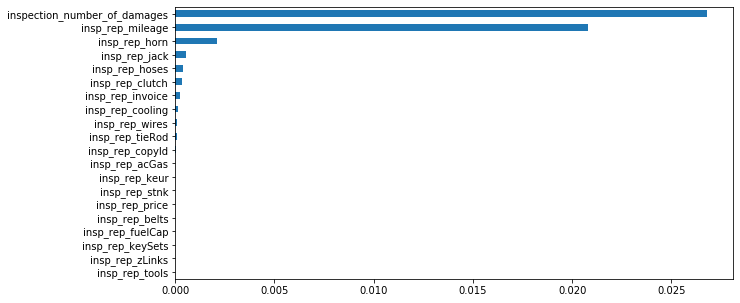

In [541]:
## create df of feature important to make plotting easy
data= []
dat ={}
objects = list(x_train.columns)[:20]
f_important = gradient_boosting_classi.feature_importances_[:20]
for i in range(len(objects)):
    dat[objects[i]] =  f_important[i]
data +=[dat]

df_imp = pd.DataFrame(data)
df_imp = df_imp.transpose()
print (df_imp.columns)
df_imp = df_imp.sort_values(by=0, axis=0, ascending=True)
df_imp

# make plot
df_imp.plot(kind='barh',legend=False, figsize=(10,5))

In [530]:
print("Accuracy score (training): {0:.3f}".format(gradient_boosting_classi.score(x_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gradient_boosting_classi.score(x_test, y_test)))

Accuracy score (training): 0.960
Accuracy score (validation): 0.958


In [531]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

predictions = gradient_boosting_classi.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[4566    1]
 [ 200    0]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4567
           1       0.00      0.00      0.00       200

    accuracy                           0.96      4767
   macro avg       0.48      0.50      0.49      4767
weighted avg       0.92      0.96      0.94      4767



In [532]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
#tn,fp,fn,tp = cm.ravel()

In [533]:
print (tn, fp, fn, tp)

4566 1 200 0


In [546]:
y_test[y_test['returned']==1].shape

(200, 1)

In [547]:
y_test[y_test['returned']==0].shape

(4567, 1)